<h1 align=center style = "font-size:300%; font-style: italic;">Assignment  64: Naive Bayes 2</h1>

-----

# Question 1 : A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

## Answer :

### We can solve this problem using Bayes' theorem. Let S be the event that an employee is a smoker, and H be the event that an employee uses the health insurance plan. We want to find the conditional probability P(S|H), i.e., the probability that an employee is a smoker given that he/she uses the health insurance plan.

### From the information given in the problem, we know:

~~~
P(H) = 0.7, since 70% of the employees use the health insurance plan.

P(S|H) = 0.4, since 40% of the employees who use the health insurance plan are smokers.
~~~

### Missing Information : Total percentage of smokers in organisation is not given

~~~
Assuming total number of smokers in the organisation to be 35%

P(S) = 0.35
~~~

### Finding Probability that an employee is a smoker given that he/she uses the health insurance plan

~~~
P(H|S) = P(S|H)*P(H)/P(S)

P(H|S) = 0.4*0.7/0.35

P(H|S) = 0.8
~~~

### Hence Probability that an employee is smoker given that he/she uses health insurance plan is 80%

# Question 2 : What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

## Answer :

### Bernoulli Naive Bayes and Multinomial Naive Bayes are two variants of the Naive Bayes algorithm, which is a probabilistic classification algorithm that is widely used in natural language processing, text mining, and other machine learning applications. Below are difference between Bernoullin and Multinomial Naive Bayes :

| Bernoulli Naive Bayes | Multinomial Naive Bayes |
|-----------------------|-------------------------|
| Assumes binary input data | Assumes count input data |
| Represents each document as a binary vector | Represents each document as a count vector |
| Calculates likelihood probabilities based on presence/absence of features | Calculates likelihood probabilities based on frequency of features |
| Suitable for problems focused on the presence or absence of features | Suitable for problems focused on the frequency of features |


# Question 3 : How does Bernoulli Naive Bayes handle missing values?

## Answer :

### In Bernoulli Naive Bayes, missing data is typically handled by assigning a special value to indicate the absence of a feature. This value is often denoted as "0" and is used to represent the absence of a feature in a document.

### During training, the algorithm learns the probabilities of each feature appearing in each class based on the available data. When a feature is missing from a document during classification, it is assumed to have the same probability of appearing in that class as it does in the training data.

### Let's say we are classifying movie reviews as positive or negative based on the presence of certain words, and we have trained a Bernoulli Naive Bayes model on a dataset of labeled reviews. During training, we see that the word "superb" appears in 80% of positive reviews and in 5% of negative reviews. Based on this, the model learns to associate the presence of "superb" with the positive class.

### Now, suppose we are given a new review that does not contain the word "superb". In this case, the model assumes that the probability of "superb" appearing in this review is 0, and calculates the probability of the review belonging to each class based on the other features that are present.

# Question 4 : Can Gaussian Naive Bayes be used for multi-class classification?

## Answer :

### Yes, Gaussian Naive Bayes can be used for multi-class classification problems. In this case, the algorithm extends the binary Gaussian Naive Bayes classifier to the multi-class setting by using the "one-vs-all" (OvA) approach.

### In the OvA approach, the multi-class problem is divided into multiple binary classification problems, with each class compared against all other classes. For example, if we have a problem with three classes (A, B, and C), we would train three binary classifiers: one to distinguish A from B and C, one to distinguish B from A and C, and one to distinguish C from A and B.

### During classification, the algorithm calculates the probability of each document belonging to each class using the corresponding binary classifier. The document is assigned to the class with the highest probability.

### In Gaussian Naive Bayes, the likelihood probability is modeled using a Gaussian distribution for each feature in each class. The algorithm estimates the mean and variance of each feature in each class based on the training data. During classification, the algorithm calculates the probability of each document belonging to each class using the Gaussian distribution parameters for that class.

### Overall, Gaussian Naive Bayes can be a useful algorithm for multi-class classification problems when the features are continuous and can be modeled using a Gaussian distribution. However, it is important to note that it makes certain assumptions about the data (such as independence of features) that may not always hold in practice.

# Question 5 : Assignment

## Answer :

### Data preparation:

Download the "Spambase Data Set" from the UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase).This dataset contains email messages, where the goal is to predict whether a message is spam or not based on several input features.



In [2]:
with open('./spambase/spambase.names','r') as f:
    a = f.read()

In [3]:
print(a)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [4]:
with open('./spambase/spambase.DOCUMENTATION','r') as f1:
    b = f1.read()

In [5]:
print(b)

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [6]:
import pandas as pd
df = pd.read_csv('./spambase/spambase.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
features=[]
for i in range(df.shape[1]):
    if i!=57:
        fs = 'f'+str(i+1)
        features.append(fs)
    else:
        features.append('target')

In [8]:
df.columns = features
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
df['target'].value_counts()

target
0    2788
1    1813
Name: count, dtype: int64

<Axes: xlabel='target'>

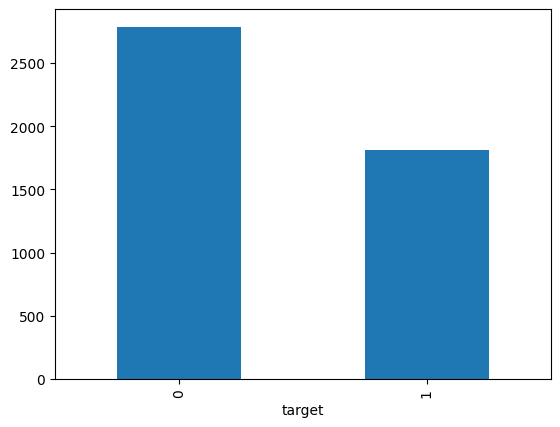

In [10]:
df['target'].value_counts().plot(kind='bar')

In [11]:
# checking null values
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       0
f37       0
f38       0
f39       0
f40       0
f41       0
f42       0
f43       0
f44       0
f45       0
f46       0
f47       0
f48       0
f49       0
f50       0
f51       0
f52       0
f53       0
f54       0
f55       0
f56       0
f57       0
target    0
dtype: int64

### Implementation:

Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the dataset. You should use the default hyperparameters for each classifier

In [14]:
# Seperating X and Y variables
X = df.drop(labels=['target'],axis=1)
Y = df['target']

In [15]:
# Train Test Split 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

### Gaussian NB

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain.values.flatten())

GaussianNB()

In [17]:
from sklearn.model_selection import StratifiedKFold
skf =  StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [18]:
from sklearn.model_selection import cross_val_score
scores_gnb = cross_val_score(GaussianNB(),xtrain,ytrain.values.flatten(),cv=skf,scoring='f1')
scores_gnb

array([0.77564103, 0.82191781, 0.80267559, 0.802589  , 0.78064516,
       0.81081081, 0.82876712, 0.82033898, 0.80130293, 0.8125    ])

In [19]:
import numpy as np
mean_score_gnb = np.mean(scores_gnb)
print('Results for Gaussian Naive Bayes')
print(f'Mean 10 fold cross validation f1 score is : {mean_score_gnb:.4f}')

Results for Gaussian Naive Bayes
Mean 10 fold cross validation f1 score is : 0.8057


### Bernoulli Naive Bayes

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain.values.flatten())

BernoulliNB()

In [21]:
scores_bnb = cross_val_score(BernoulliNB(),xtrain,ytrain.values.flatten(),cv=skf,scoring='f1')
scores_bnb

array([0.84897959, 0.84677419, 0.84120172, 0.8515625 , 0.85258964,
       0.81512605, 0.8879668 , 0.85232068, 0.85483871, 0.84081633])

In [22]:
mean_score_bnb = np.mean(scores_bnb)
print('Results for BernoulliNB :')
print(f'Mean 10 fold cross validation f1 score is : {mean_score_bnb:.4f}')

Results for BernoulliNB :
Mean 10 fold cross validation f1 score is : 0.8492


### Multinomial Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain.values.flatten())

MultinomialNB()

In [25]:
scores_mnb = cross_val_score(MultinomialNB(),xtrain,ytrain.values.flatten(),cv=skf,scoring='f1')
scores_mnb

array([0.70817121, 0.68907563, 0.74509804, 0.71604938, 0.67741935,
       0.72131148, 0.76      , 0.712     , 0.703125  , 0.7768595 ])

In [26]:
mean_score_mnb = np.mean(scores_mnb)
print('Results for MultinomialNB :')
print(f'Mean 10 fold cross validation f1 score is : {mean_score_mnb:.4f}')

Results for MultinomialNB :
Mean 10 fold cross validation f1 score is : 0.7209


### Bernoulli Naive Bayes provided Highest training cross validation score of 0.8492 

### Results: 

Report the following performance metrics for each classifier:

* Accuracy

* Precision

* Recall

* F1 score

In [29]:
# Define a function to store all above metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy  : {acc:.4f}')
    print(f'Precision : {pre:.4f}')
    print(f'Recall    : {rec:.4f}')
    print(f'F1 Score  : {f1:.4f}')
    return acc, pre, rec, f1

### Evaluate GaussianNB

In [30]:
print('Gaussian Naive Bayes Results : \n')
acc_gnb, pre_gnb, rec_gnb, f1_gnb = evaluate_model(xtest,ytest.values.flatten(),gnb)

Gaussian Naive Bayes Results : 

Accuracy  : 0.8240
Precision : 0.7048
Recall    : 0.9522
F1 Score  : 0.8100


### Evaluate BernoulliNB

In [31]:
print('Bernoulli Naive Bayes Results : \n')
acc_bnb, pre_bnb, rec_bnb, f1_bnb = evaluate_model(xtest,ytest.values.flatten(),bnb)

Bernoulli Naive Bayes Results : 

Accuracy  : 0.8870
Precision : 0.8865
Recall    : 0.8180
F1 Score  : 0.8509


### Evaluate MultinomialNB

In [32]:
print('Multinomial Naive Bayes Results : \n')
acc_mnb, pre_mnb, rec_mnb, f1_mnb = evaluate_model(xtest,ytest.values.flatten(),mnb)

Multinomial Naive Bayes Results : 

Accuracy  : 0.7697
Precision : 0.7190
Recall    : 0.6820
F1 Score  : 0.7000


### Discussion:

Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is the case? Are there any limitations of Naive Bayes that you observed?

In [33]:
# Creating a dictionary for dataframe
dct = {
    'score':['accuracy','precision','recall','f1'],
    'Gaussian':[acc_gnb,pre_gnb,rec_gnb,f1_gnb],
    'Bernoulli':[acc_bnb,pre_bnb,rec_bnb,f1_bnb],
    'Multinomial':[acc_mnb,pre_mnb,rec_mnb,f1_mnb]
}

In [34]:
# Creating a DataFrame
df_compare = pd.DataFrame(dct)
df_compare

,score,Gaussian,Bernoulli,Multinomial
0,accuracy,0.824041,0.887038,0.769732
1,precision,0.704762,0.886454,0.718992
2,recall,0.952206,0.818015,0.681985
3,f1,0.810008,0.850860,0.700000


In [35]:
dct_crossval = {
    'models':['Gaussian','Bernoulli','Multinomial'],
    'cross_val_score_mean':[mean_score_gnb,mean_score_bnb,mean_score_mnb]
}

In [36]:
df_crossval = pd.DataFrame(dct_crossval)
df_crossval

,models,cross_val_score_mean
0,Gaussian,0.805719
1,Bernoulli,0.849218
2,Multinomial,0.720911


### Best Model for above data is `Bernoulli Naive Bayes`
Bernoulli Naive Bayes is best model because of below reasons :
1. BernoulliNB has highest test f1 score of 0.8509
2. BernoulliNB has highest test accuracy of 0.8870
3. BernoulliNB has highest 10 fold cross validation F1 score of 0.8492

### Although Naive Bayes algorithm is a powerful and widely used algorithm, it also has some limitations, including:

1. The assumption of feature independence: The Naive Bayes algorithm assumes that the features are independent of each other. However, in real-world scenarios, this assumption is not always true, and features may be dependent on each other.

2. Sensitivity to input data: Naive Bayes algorithm is very sensitive to input data, and even a slight change in the input data can significantly affect the accuracy of the model.

3. Lack of tuning parameters: Naive Bayes algorithm does not have many tuning parameters that can be adjusted to improve its performance.

4. Data sparsity problem: Naive Bayes algorithm relies on a lot of training data to estimate the probabilities of different features. However, if some features have very low frequencies in the training data, the algorithm may not be able to accurately estimate their probabilities.

5. Class-conditional independence assumption: Naive Bayes algorithm assumes that each feature is conditionally independent given the class. However, in many cases, this assumption may not hold, and the algorithm may not perform well.

6. Imbalanced class distribution: Naive Bayes algorithm assumes that the classes are equally likely, but in real-world scenarios, the class distribution may be imbalanced, which can lead to biased results.

7. The need for continuous data: Naive Bayes algorithm assumes that the input features are continuous, which may not always be the case in real-world scenarios where the input features are discrete.

### Conclusion:

Summarise your findings and provide some suggestions for future work.

### Below are conclusions for above model
1. Bernoulli Naive Bayes performed best on both cross validation and test dataset.
2. For Email Classification Neural Network is better suited algorithm as it is able to provide better results and has lot of tunable paramenters.

In [38]:
# Saving the BernoulliNB file to pickle for future use
import pickle
with open('BernoulliModel.pkl','wb') as f:
    pickle.dump(bnb,file=f)